In [1]:
import math
import numpy as np
import scipy as sc
import random as rd
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
feature_name = ['Class','Alcohol',  'Malic acid', 'Ash' , 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'] 

In [3]:
raw_data = pd.read_csv('wine.data', names = feature_name)

In [4]:
y = raw_data['Class']
X = raw_data.drop(columns=['Class'])

In [5]:
std_scale = StandardScaler()
standard_scaled_data = std_scale.fit_transform(X)

/Users/aakashvarshney/.local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/aakashvarshney/.local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
training_var = standard_scaled_data.shape[0]
features = standard_scaled_data.shape[1]
k = 3
iterations = 300

In [7]:
def euc_distance(feature1, feature2):
    for i in range(len(feature1)):
        distance += (feature1[i] - feature2[i])**2
    final_distance = sqrt(distance)
    return final_distance

In [8]:
# center = []
# center = np.asarray(center).reshape(training_var,0)
center = np.array([]).reshape(features, 0)
center_mean = np.array([]).reshape(features, 0) 

In [9]:
for i in range(k):
    rand = rd.randint(0,training_var-1)
    center = np.c_[center,standard_scaled_data[rand]]
    center_mean = np.c_[center_mean,standard_scaled_data[rand]]
    

In [10]:
EUD = np.array([]).reshape(training_var,0)
for a in range(k):
    dist = np.sum((standard_scaled_data-center[:,a])**2,axis=1)
    EUD = np.c_[EUD,dist]
index = np.argmin(EUD,axis=1)+1

In [11]:
expected_output = {}
for a in range(k):
    expected_output[a+1] = np.array([]).reshape(13,0)
for i in range(training_var):
    expected_output[index[i]] = np.c_[expected_output[index[i]],standard_scaled_data[i]]   
for a in range(k):
    expected_output[a+1] = expected_output[a+1].T  
for a in range(k):
    center[:,a]=sc.stats.mode(expected_output[a+1],axis=0)[0]
    center_mean[:,a]=np.mean(expected_output[a+1],axis=0)
    

### Unclustered Data

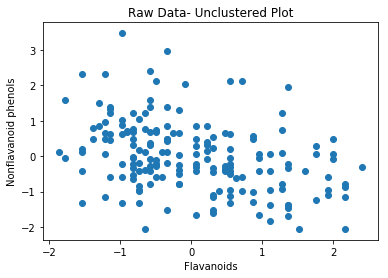

In [21]:
plt.xlabel("Flavanoids")
plt.ylabel('Nonflavanoid phenols')
plt.title('Raw Data- Unclustered Plot')
plt.scatter(standard_scaled_data[:, 7], standard_scaled_data[:, 8])

### Clustered Data with K-Means Algorithm with clusters being shown

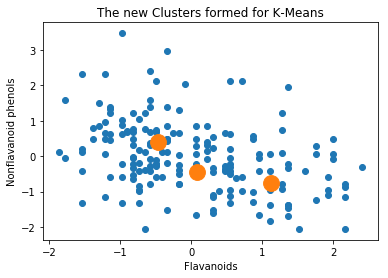

In [18]:
plt.xlabel("Flavanoids")
plt.ylabel('Nonflavanoid phenols')
plt.title('The new Clusters formed for K-Means')
plt.scatter(standard_scaled_data[:, 7], standard_scaled_data[:, 8])
plt.scatter(center_mean[7,:], center_mean[8, :], s = 250)

### Clustered Data with K-Mode Algorithm with clusters being shown

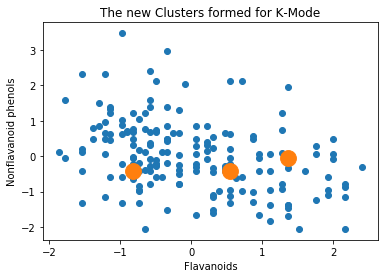

In [19]:
plt.xlabel("Flavanoids")
plt.ylabel('Nonflavanoid phenols')
plt.title('The new Clusters formed for K-Mode')
plt.scatter(standard_scaled_data[:, 7], standard_scaled_data[:, 8])
plt.scatter(center[7,:], center[8, :], s = 250)

The value of clusters formed can be changed by changing the value of k. Which for now is set to 3 and the number of iterations is 300. Which means it illustrates 300 times to form 3 clusters. 